# Initialisation des packages et chargement du jeu de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

In [77]:
dir_file = 'C:/Users/paul.bonte/Formation OC/P7_Bonte_Paul/data/'

test = pd.read_csv(dir_file + 'application_test.csv')
train = pd.read_csv(dir_file + 'application_train.csv')
bureau = pd.read_csv(dir_file + 'bureau.csv')
bureau_balance = pd.read_csv(dir_file + 'bureau_balance.csv')
cc = pd.read_csv(dir_file + 'credit_card_balance.csv')
instal_paiement = pd.read_csv(dir_file + 'installments_payments.csv')
POS_cash = pd.read_csv(dir_file + 'POS_CASH_balance.csv')

In [3]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [5]:
print(bureau.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


In [6]:
print(bureau_balance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


In [7]:
print(cc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [8]:
print(instal_paiement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


In [9]:
print(POS_cash.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


# Feature engineering

## Variable de regroupement

In [10]:
print("train data: %s rows and %s cols"%train.shape)
print("Credit Card Balance: %s rows and %s cols"%cc.shape)
print("Bureau: %s rows and %s cols"%bureau.shape)
print("Installments Payments: %s rows and %s cols"%instal_paiement.shape)
print("POS_cash: %s rows and %s cols"%POS_cash.shape)

train data: 307511 rows and 122 cols
Credit Card Balance: 3840312 rows and 23 cols
Bureau: 1716428 rows and 17 cols
Installments Payments: 13605401 rows and 8 cols
POS_cash: 10001358 rows and 8 cols


In [11]:
print(train.SK_ID_CURR.nunique())
print(cc.SK_ID_CURR.nunique())
print(bureau.SK_ID_CURR.nunique())
print(instal_paiement.SK_ID_CURR.nunique())
print(POS_cash.SK_ID_CURR.nunique())

307511
103558
305811
339587
337252


## Création des features

In [78]:
# Dépenses du mois avant crédit / limite de retrait mensuel : Reste t il de l'argent dispo 
cc['AMT_DRAWINGS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# retrait cash du mois avant crédit / limite de retrait mensuel
cc['AMT_DRAWINGS_ATM_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_ATM_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Autres retrait mois avant crédit /  limite de retrait mensuel
cc['AMT_DRAWINGS_OTHER_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_OTHER_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Montant tiré ou acheté des biens au cours du mois du crédit précédent /  limite de retrait mensuel
cc['AMT_DRAWINGS_POS_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_DRAWINGS_POS_CURRENT,cc.AMT_CREDIT_LIMIT_ACTUAL)]
# Montant restant sur le crédit précédent / Montant à recevoir sur le crédit précédent
cc['AMT_PRINCIPAL_RECEIVABLE_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(cc.AMT_RECEIVABLE_PRINCIPAL,cc.AMT_RECIVABLE)]

# On récupère la moyenne des principaux indicateurs du doc cc : balance carte bleue, retraits, ...
cc_use = cc.groupby(['SK_ID_CURR'],as_index=False).agg({'AMT_BALANCE': np.mean,
                                                        'AMT_DRAWINGS_PCT':np.mean,
                                                        'AMT_DRAWINGS_ATM_PCT':np.mean,
                                                        'AMT_DRAWINGS_OTHER_PCT':np.mean,
                                                        'AMT_DRAWINGS_POS_PCT':np.mean,
                                                        'AMT_PRINCIPAL_RECEIVABLE_PCT':np.mean,
                                                        'CNT_DRAWINGS_ATM_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_OTHER_CURRENT':np.mean,
                                                        'CNT_DRAWINGS_POS_CURRENT':np.mean,
                                                        'SK_DPD':np.mean,
                                                        'SK_DPD_DEF':np.mean})
# Date échéance prévu - date de paiement : retard ?
instal_paiement['DAYS_INSTALMENT_DIFF'] = instal_paiement['DAYS_INSTALMENT'] - instal_paiement['DAYS_ENTRY_PAYMENT']
# Ce que le client a réellement payé sur le crédit précédent / ce qui aurait du l'etre
instal_paiement['AMT_PATMENT_PCT'] = [x/y if (y != 0) & pd.notnull(y) else np.nan for x,y in zip(instal_paiement.AMT_PAYMENT,instal_paiement.AMT_INSTALMENT)]
# On récupère la moyenne des principaux indicateurs du doc 
pmts_use = instal_paiement.groupby(['SK_ID_CURR'],as_index=False).agg({'DAYS_INSTALMENT_DIFF':np.mean,
                                                            'AMT_PATMENT_PCT':np.mean})   

## Merge et récupération du Df final

In [87]:
# Merge Credit Card Balance & Installment Payments
train = train.merge(cc_use,on='SK_ID_CURR',how='left')
train = train.merge(pmts_use,on='SK_ID_CURR',how='left')
train_imp = train.head(100003) 

In [89]:
train_imp.to_csv('train.csv', index=False)

In [14]:
print(train.shape)

(307511, 136)


# EDA

## Exploration des données

In [15]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AMT_DRAWINGS_POS_PCT,AMT_PRINCIPAL_RECEIVABLE_PCT,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,SK_DPD,SK_DPD_DEF,DAYS_INSTALMENT_DIFF,AMT_PATMENT_PCT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,60383.000000,59775.000000,61140.000000,86905.000000,61140.000000,61140.000000,86905.000000,86905.000000,291635.000000,291632.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.041480,0.863346,0.566241,1.541650,0.007255,1.750056,4.209093,0.126870,11.201740,1.382975
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.094462,0.246759,0.880410,3.693164,0.047259,4.274905,44.602274,10.034009,13.149489,30.178966
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,-11.151542,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1884.204545,0.333333
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.832939,0.062993,0.000000,0.000000,0.000000,0.000000,0.000000,5.854545,0.953846
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.002105,0.958271,0.270833,0.216216,0.000000,0.045455,0.000000,0.000000,9.541667,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.039607,0.975594,0.731343,1.324324,0.000000,1.428571,0.000000,0.000000,14.831077,1.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,2.738914,30.200277,35.000000,118.250000,2.000000,118.250000,1386.947917,1309.600000,295.000000,8482.446155


In [16]:
train.hist(figsize=(150,150))

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_REGISTRATION'}>],
       [<AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

object column NAME_CONTRACT_TYPE have 2 unique values
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-------------
object column CODE_GENDER have 3 unique values
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-------------
object column FLAG_OWN_CAR have 2 unique values
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
-------------
object column FLAG_OWN_REALTY have 2 unique values
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
-------------
object column NAME_TYPE_SUITE have 7 unique values
object column NAME_INCOME_TYPE have 8 unique values
object column NAME_EDUCATION_TYPE have 5 unique values
object column NAME_FAMILY_STATUS have 6 unique values
object column NAME_HOUSING_TYPE have 6 unique values
object column OCCUPATION_TYPE have 18 unique values
object column WEEKDAY_APPR_PROCESS_START have 7 unique values
object column ORGANIZATION_TYPE have 58 unique values
object column FONDKAPREMONT_M

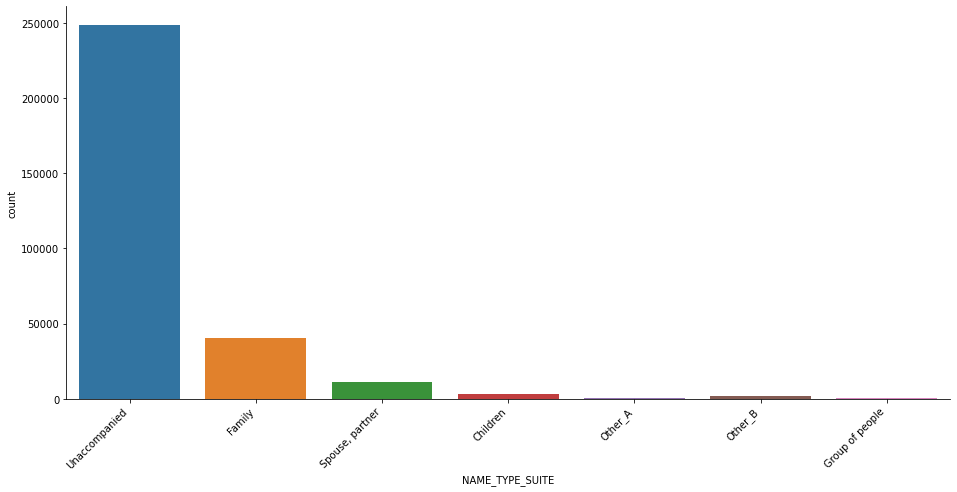

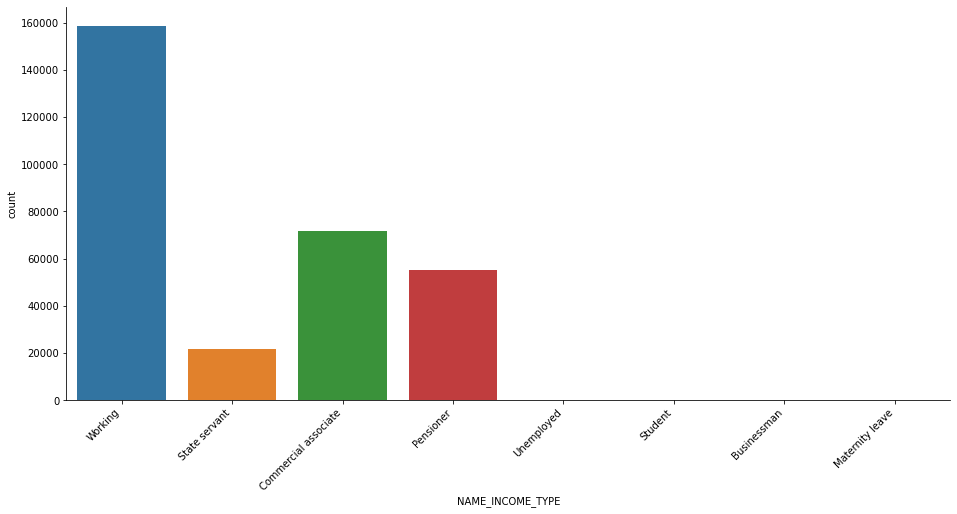

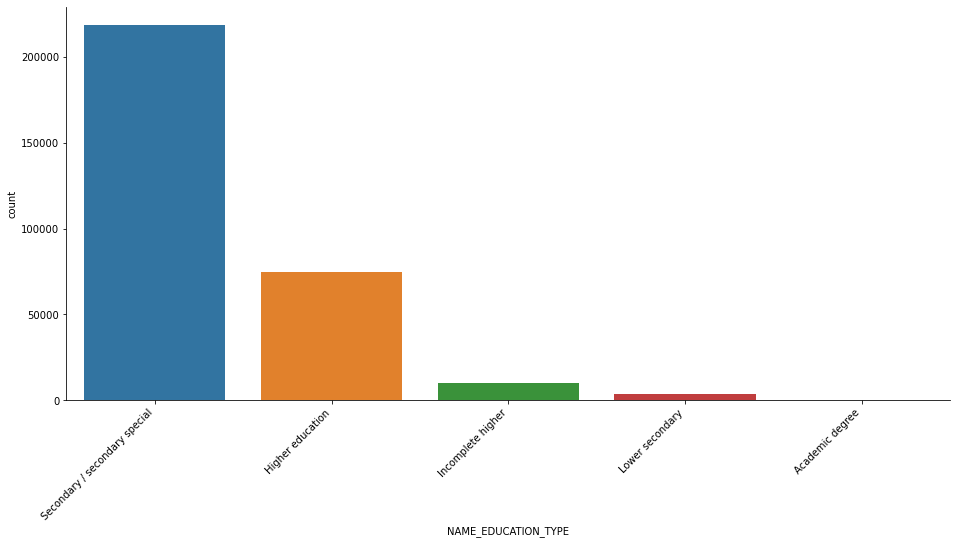

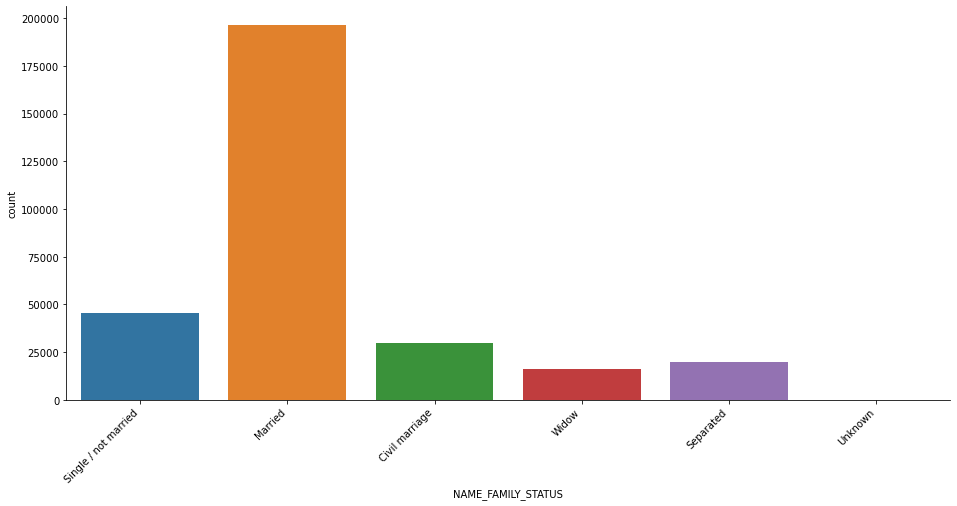

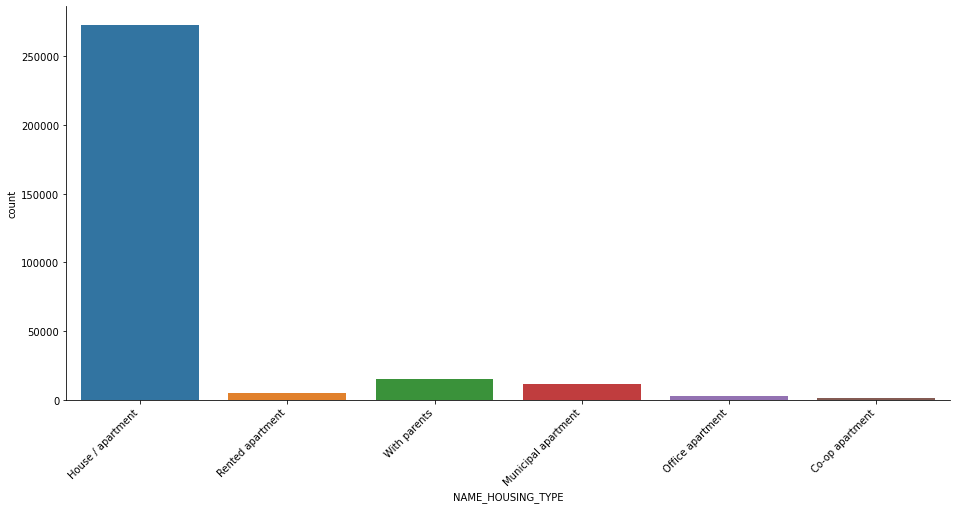

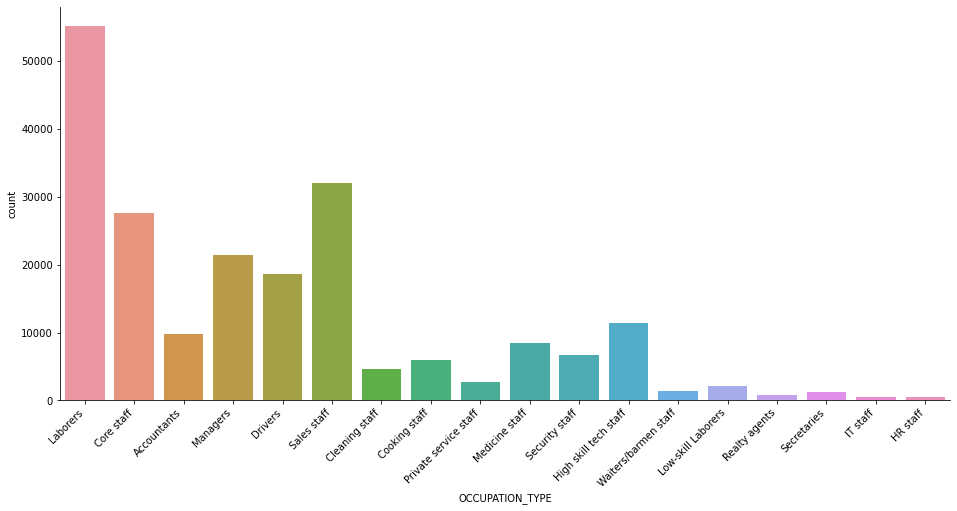

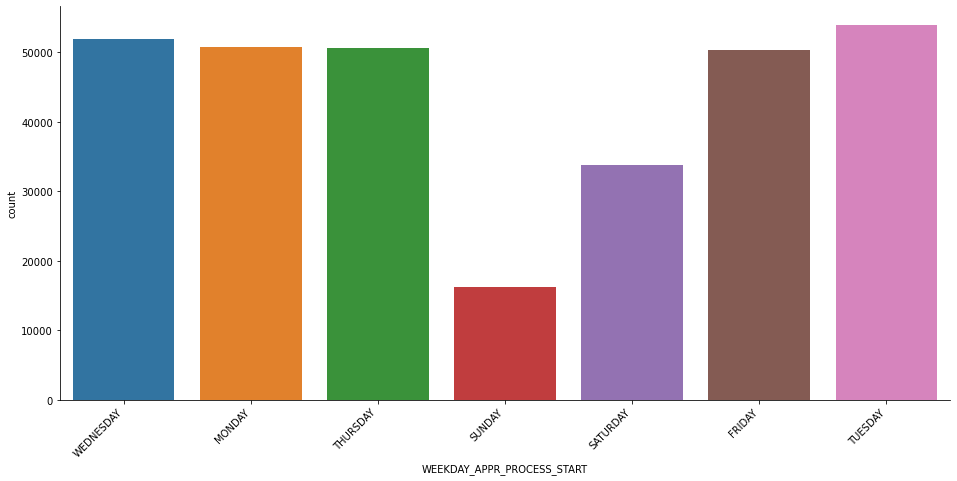

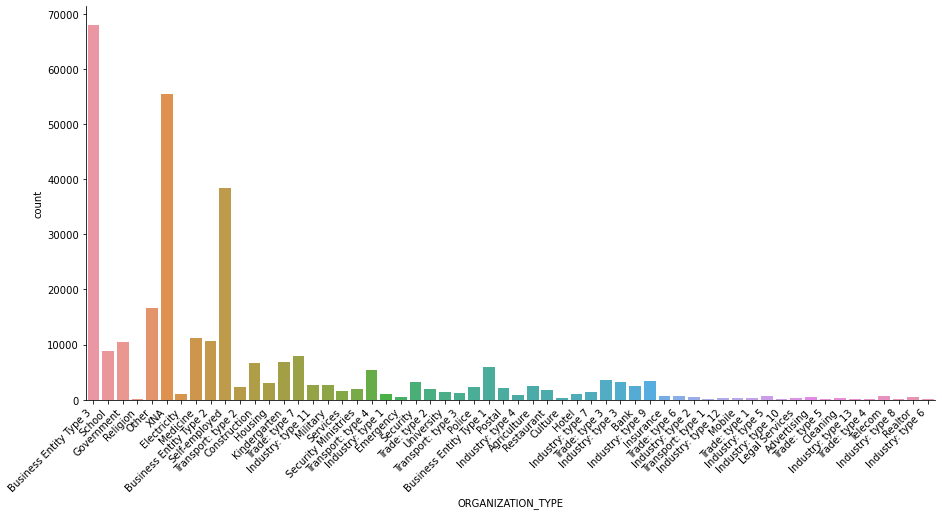

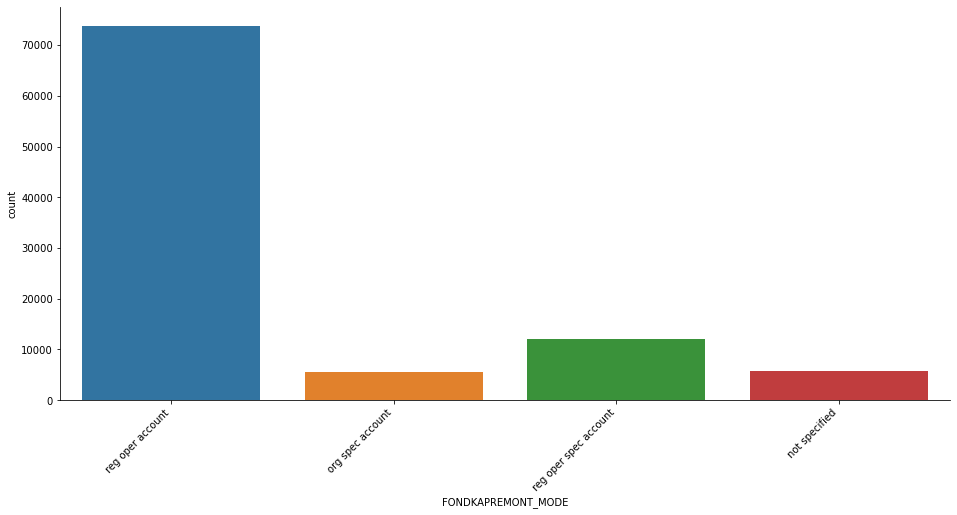

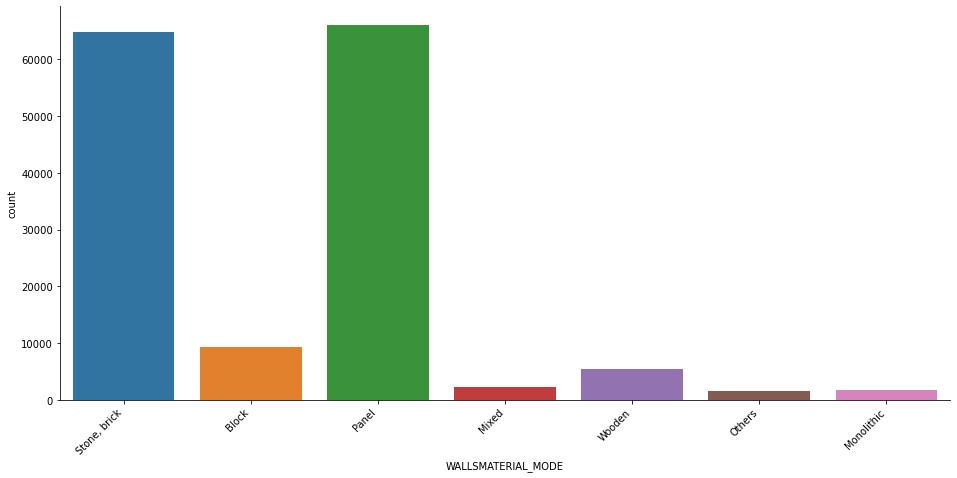

In [17]:
for col in train.columns:
    if train[col].dtype == 'object':
        print("object column %s have %s unique values"%(str(col),train[col].nunique()))
        if train[col].nunique() <= 3:
            print(train[col].value_counts(dropna = False))
            print('-------------')
        else:
            ax = sns.catplot(x=col, kind="count", data=train,height=6, aspect=2.2)
            for axes in ax.axes.flat:
                axes.set_xticklabels(axes.get_xticklabels(),rotation = 45,horizontalalignment = 'right')

In [18]:
train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [19]:
train = train[train['CODE_GENDER'] != 'XNA']

In [20]:
train['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [21]:
train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Industry' if 'Industry' in x else x)
train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Trade' if 'Trade' in x else x)
train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Business Entity' if 'Business Entity' in x else x)
train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Transport' if 'Transport' in x else x)
print(train['ORGANIZATION_TYPE'].unique())

['Business Entity' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Self-employed' 'Transport' 'Construction'
 'Housing' 'Kindergarten' 'Trade' 'Industry' 'Military' 'Services'
 'Security Ministries' 'Emergency' 'Security' 'University' 'Police'
 'Postal' 'Agriculture' 'Restaurant' 'Culture' 'Hotel' 'Bank' 'Insurance'
 'Mobile' 'Legal Services' 'Advertising' 'Cleaning' 'Telecom' 'Realtor']


C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_1240/3968831165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Industry' if 'Industry' in x else x)
C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_1240/3968831165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['ORGANIZATION_TYPE'] = train.ORGANIZATION_TYPE.apply(lambda x: 'Trade' if 'Trade' in x else x)
C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_1240/3968831165.py:3:

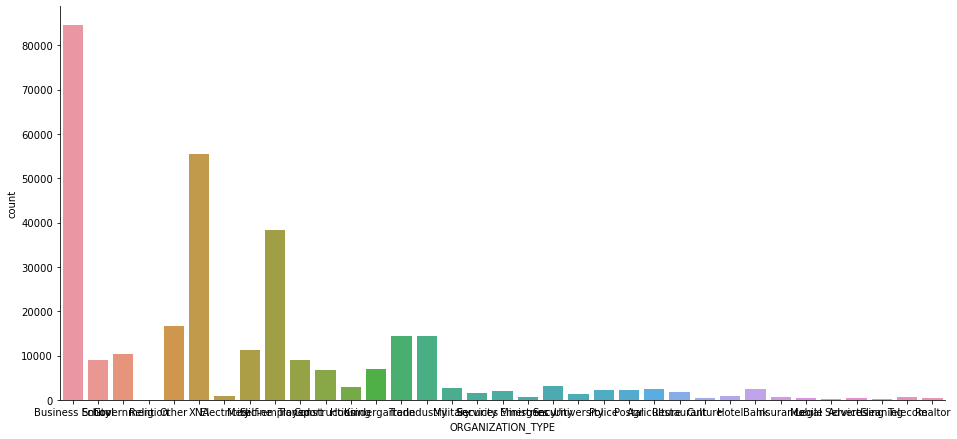

In [22]:
sns.catplot(x='ORGANIZATION_TYPE', kind="count", data=train,height=6, aspect=2.2)

## Données manquantes

AxesSubplot(0.125,0.125;0.775x0.755)


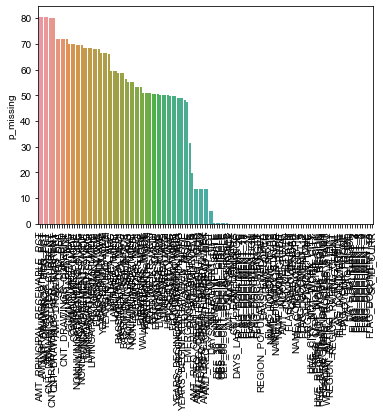

In [23]:
# Ajouter dans une variable un dataframe comprenant le % de valeur manquante par colonne
Nb_missing = pd.DataFrame(train.isna().sum()/train.shape[0]*100)
Nb_missing.columns = ["p_missing"]
Nb_missing.sort_values(ascending = False, by = 'p_missing', inplace=True)

# Représentation graphique
fig1 = sns.barplot(x = Nb_missing.index, y = "p_missing" , data = Nb_missing)
sns.set(rc={'figure.figsize':(10,20)})
plt.xticks(rotation=90)
print(fig1)

In [24]:
train = train[train.columns[train.isnull().mean() < 0.4]]

AxesSubplot(0.125,0.125;0.775x0.755)


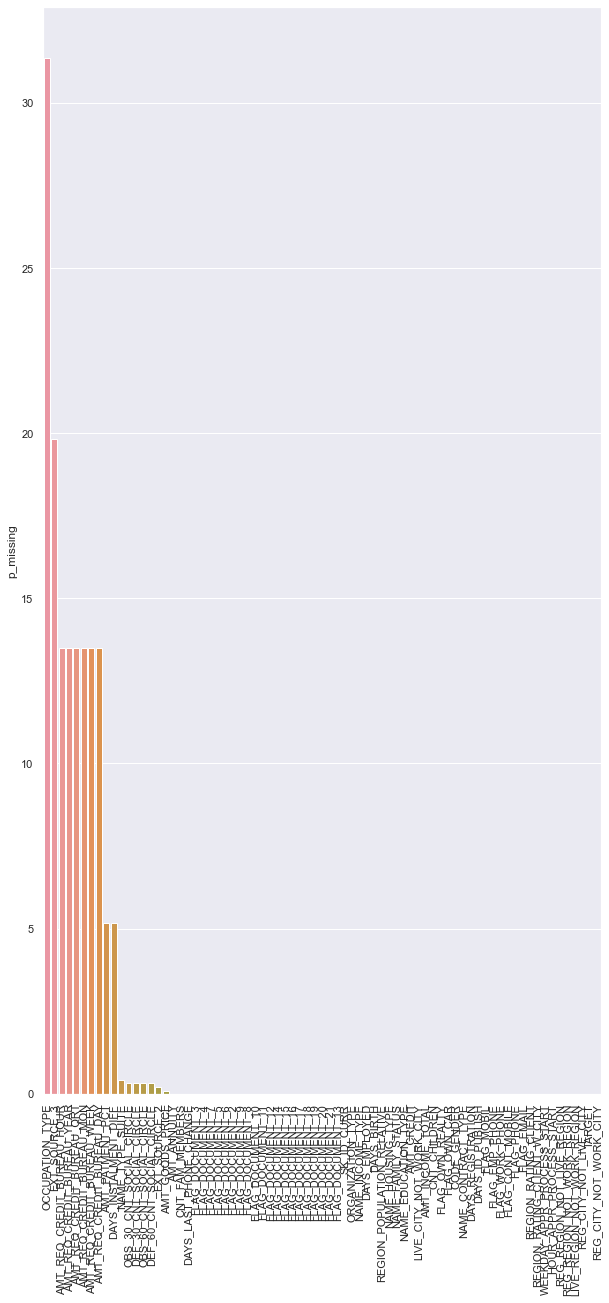

In [25]:
# Ajouter dans une variable un dataframe comprenant le % de valeur manquante par colonne
Nb_missing = pd.DataFrame(train.isna().sum()/train.shape[0]*100)
Nb_missing.columns = ["p_missing"]
Nb_missing.sort_values(ascending = False, by = 'p_missing', inplace=True)

# Représentation graphique
fig1 = sns.barplot(x = Nb_missing.index, y = "p_missing" , data = Nb_missing)
sns.set(rc={'figure.figsize':(12,12)})
plt.xticks(rotation=90)
print(fig1)

In [26]:
train.shape

(307507, 75)

## Analyse TARGET

In [27]:
train.TARGET.value_counts(normalize= True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

<AxesSubplot:title={'center':'target'}, ylabel='Frequency'>

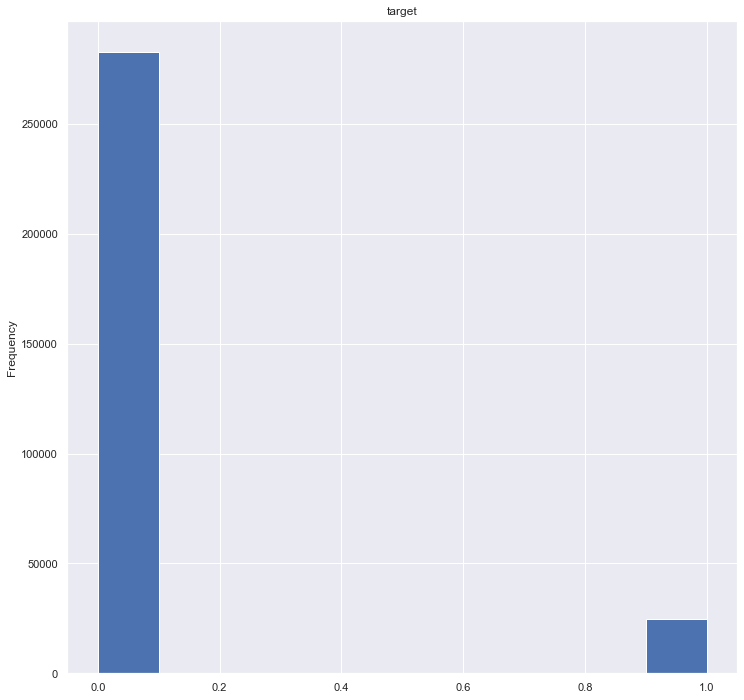

In [28]:
train['TARGET'].plot.hist(title = 'target')

## Analyse des corrélations

<AxesSubplot:>

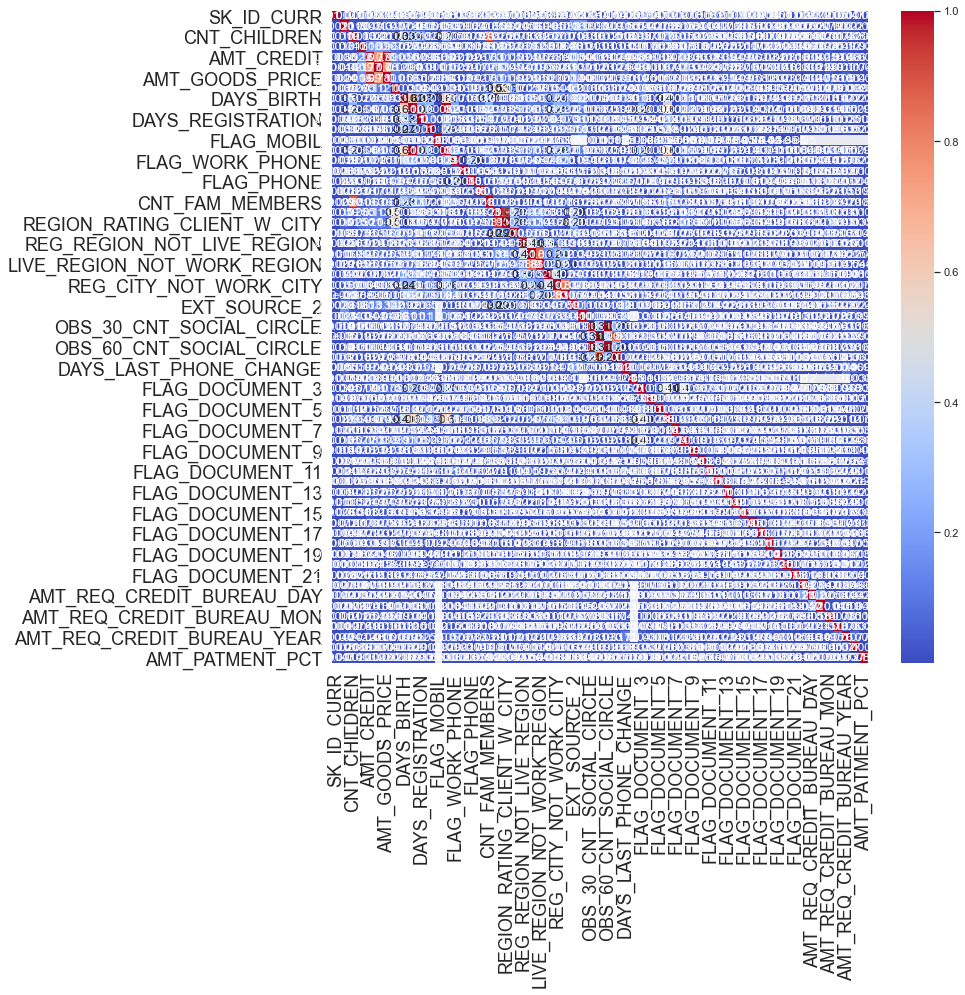

In [29]:
mat_corr = train.corr()
ax = sns.heatmap(abs(mat_corr) , annot = True , cmap = 'coolwarm')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax

In [30]:
correlations = train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_WORK_CITY         0.050992
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055219
REGION_RATING_CLIENT           0.058901
REGION_RATING_CLIENT_W_CITY    0.060895
DAYS_BIRTH                     0.078242
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178926
EXT_SOURCE_2                 -0.160471
DAYS_EMPLOYED                -0.044934
AMT_GOODS_PRICE              -0.039647
REGION_POPULATION_RELATIVE   -0.037225
AMT_CREDIT                   -0.030371
FLAG_DOCUMENT_6              -0.028603
HOUR_APPR_PROCESS_START      -0.024164
Name: TARGET, dtype: float64


array([[<AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'DAYS_LAST_PHONE_CHANGE'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'TARGET'}>, <AxesSubplot:>]],
      dtype=object)

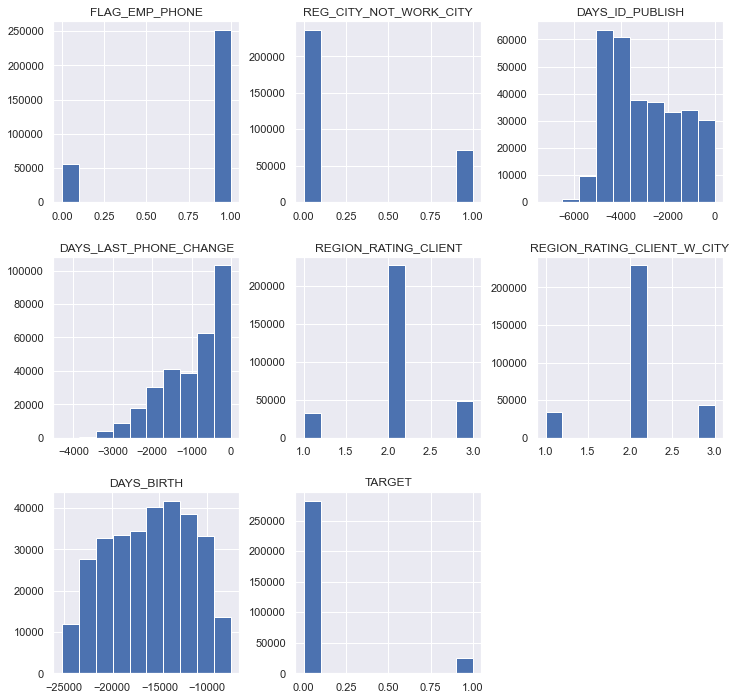

In [31]:
pos_corr = correlations.tail(8)
df_pos = train[pos_corr.index]
df_pos.hist()

array([[<AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'REG_CITY_NOT_WORK_CITY'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'DAYS_LAST_PHONE_CHANGE'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'TARGET'}>, <AxesSubplot:>]],
      dtype=object)

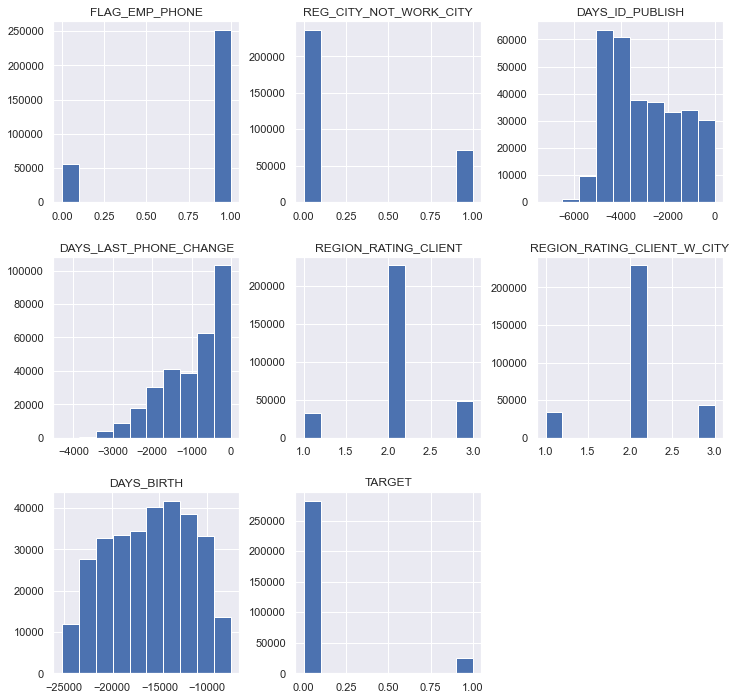

In [32]:
neg_corr = correlations.tail(8)
df_pos = train[neg_corr.index]
df_pos.hist()

# Preprocessing

## Split des données

In [33]:
y_columns = ['TARGET']
X_id = train.drop(y_columns, axis=1)
print(X_id.shape)
y = train[y_columns]
print(y.shape)

(307507, 74)
(307507, 1)


In [34]:
X_id = pd.get_dummies(X_id)

In [35]:
X = X_id.drop(['SK_ID_CURR'],axis=1).reset_index(drop=True)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

## Création pipelines

In [37]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [38]:
categorical_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="most_frequent"))])

In [39]:
numeric_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="median")), 
           ("scale", RobustScaler())])

In [40]:
cat_cols = X_train.select_dtypes(exclude="number").columns
num_cols = X_train.select_dtypes(exclude=["bool_","object_"]).columns

In [41]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),])

In [42]:
X_train_pro = full_processor.fit_transform(X_train)

In [63]:
data = pd.DataFrame(data = X_train_pro, columns = X.columns)

In [64]:
data["SK_ID_CURR"] = X_id['SK_ID_CURR']

In [75]:
data = data.head(100003)

In [68]:
data.to_csv('data.csv', index=False)

In [46]:
X_test_pro = full_processor.transform(X_test)

## Resampling

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
print(X_train_pro.shape)
print(y_train.shape)

(215254, 161)
(215254, 1)


In [49]:
y_train_imb = np.ravel(y_train)

In [70]:
smt = SMOTE()
X_train_imp , y_train_imp = smt.fit_resample(X_train_pro,y_train)

In [71]:
print(X_train_imp.shape)
print(y_train_imp.shape)

(395754, 161)
(395754, 1)


In [72]:
y_train_imp = np.ravel(y_train_imp)

## Récupérer les noms des features

In [73]:
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [74]:
names = get_feature_names(full_processor)

C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_1240/1809191144.py:30: UserWarning: Transformer impute (type SimpleImputer) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
C:\Users\PAUL~1.BON\AppData\Local\Temp/ipykernel_1240/1809191144.py:30: UserWarning: Transformer scale (type RobustScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


# Modélisation

## Baseline

In [ ]:
from sklearn import dummy 
from sklearn import metrics

In [ ]:
my_dummy = dummy.DummyClassifier(strategy = 'most_frequent')

In [ ]:
my_dummy.fit(X = X_train_imp, y = y_train_imp)

In [ ]:
y_prob_dummy = (my_dummy.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
fpr_dummy, tpr_dummy, th_dummy = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)
print(roc_auc_dummy)

In [ ]:
sns.set(rc={'figure.figsize':(4,8)})
plt.plot(fpr_dummy, tpr_dummy ,linestyle='--', label = "Dummy AUC %0.2f" % roc_auc_dummy)

In [ ]:
cm = metrics.confusion_matrix(y_true= y_test, y_pred = (y_prob_dummy >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, f1_score, roc_auc_score, roc_curve, confusion_matrix, recall_score
from datetime import datetime

In [ ]:
log_reg = LogisticRegression(solver = 'liblinear')

### Imbalanced

In [ ]:
log_reg.fit(X_train_pro, y_train_imb)

In [ ]:
y_prob_log = (log_reg.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
y_pred_log = log_reg.predict(X_test_pro)

In [ ]:
sns.histplot(y_prob_log)

In [ ]:
fpr_log, tpr_log, th_log = metrics.roc_curve(y_test, y_prob_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)
print('ROC_AUC:', roc_auc_log)
accuracy_score_log = accuracy_score(y_test, y_pred_log)
print('Accuracy_score:', accuracy_score_log)
recall_log = recall_score(y_test, y_pred_log)
print('Recall:' , recall_log)
f1_log = f1_score(y_test, y_pred_log)
print('f1_score:' , f1_log)

In [ ]:
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_log >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Balanced

In [ ]:
start_time = datetime.now()
log_reg.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
log_time = end_time - start_time

In [ ]:
y_prob_log = (log_reg.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
y_pred_log = log_reg.predict(X_test_pro)

In [ ]:
sns.histplot(y_prob_log)

In [ ]:
fpr_log, tpr_log, th_log = metrics.roc_curve(y_test, y_prob_log)
roc_auc_log = metrics.auc(fpr_log, tpr_log)
print('ROC_AUC:', roc_auc_log)
accuracy_score_log = accuracy_score(y_test, y_pred_log)
print('Accuracy_score:', accuracy_score_log)
recall_log = recall_score(y_test, y_pred_log)
print('Recall:' , recall_log)
f1_log = f1_score(y_test, y_pred_log)
print('f1_score:' , f1_log)

In [ ]:
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_log >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Feature importance global

In [ ]:
feature_imp = pd.DataFrame(names, columns = ['Feature'])
feature_imp['importance'] = log_reg.coef_[0]
feature_imp.sort_values(by = 'importance', ascending = False, inplace = True)
top = feature_imp.head(10)
down = feature_imp.tail(10)

In [ ]:
df_imp = pd.concat([top, down])

In [ ]:
df_imp.plot.barh(x = 'Feature' , y = 'importance')

### Feature importance locale

In [ ]:
import lime
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_imp),
    feature_names= names,
    class_names=['0', '1'],
    mode='classification')

In [ ]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=log_reg.predict_proba
)

exp.show_in_notebook(show_table=True)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
start_time = datetime.now()
rf.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
rf_time = end_time - start_time

In [ ]:
y_prob_rf = (rf.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
y_pred_rf = rf.predict(X_test_pro)

In [ ]:
sns.histplot(y_prob_rf)

In [ ]:
fpr_rf, tpr_rf, th_rf = metrics.roc_curve(y_test, y_prob_rf)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
print('ROC_auc' , roc_auc_rf)
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy_score:', accuracy_score_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print('Recall:' , recall_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print('f1_score:' , f1_rf)

In [ ]:
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_rf >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Feature importance global

In [ ]:
importance = rf.feature_importances_
fi_rf = pd.concat((pd.DataFrame(names, columns = ['Variables']), 
                      pd.DataFrame(importance, columns = ['Importance'])), axis = 1).sort_values(by='Importance', ascending = False)

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Rf - Top 10 Features')
sns.barplot(y = fi_rf['Variables'].head(10),
            x = fi_rf['Importance'].head(10))
plt.show()

### Feature importance locale

In [ ]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=rf.predict_proba
)

exp.show_in_notebook(show_table=True)

# Xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb = xgb.XGBClassifier(use_label_encoder=False , eval_metric = 'logloss')

In [ ]:
start_time = datetime.now()
xgb.fit(X_train_imp, y_train_imp)
end_time = datetime.now()
xgb_time = end_time - start_time

In [ ]:
y_prob_xgb = (xgb.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
y_pred_xgb = xgb.predict(X_test_pro)

In [ ]:
sns.histplot(y_prob_xgb)

In [ ]:
fpr_xgb, tpr_xgb, th_xgb = metrics.roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
print('ROC_auc' , roc_auc_xgb)
accuracy_score_xgb = accuracy_score(y_test, y_pred_xgb)
print('Accuracy_score:', accuracy_score_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
print('Recall:' , recall_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print('f1_score:' , f1_xgb)

In [ ]:
plt.plot(fpr_xgb, tpr_xgb ,linestyle='--', label = "XGB_grid AUC %0.2f" % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (y_prob_xgb >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Feature importance global

In [ ]:
importance = xgb.feature_importances_
fi_xgb = pd.concat((pd.DataFrame(names, columns = ['Variables']), 
                      pd.DataFrame(importance, columns = ['Importance'])), axis = 1).sort_values(by='Importance', ascending = False)

In [ ]:
plt.figure(figsize=(8,8))
plt.title('XGB - Top 10 Features')
sns.barplot(y = fi_xgb['Variables'].head(10),
            x = fi_xgb['Importance'].head(10))
plt.show()

## Feature importance locale

In [ ]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=xgb.predict_proba
)

exp.show_in_notebook(show_table=True)

# Comparaison des modèles

In [ ]:
df_comparaison = pd.DataFrame({'Roc_auc' : [roc_auc_log,roc_auc_rf,roc_auc_xgb],
                               'Accuracy_score' :[accuracy_score_log,accuracy_score_rf,accuracy_score_xgb],
                               'Recall_score' : [recall_log,recall_rf,recall_xgb],
                              'F1_score' :[f1_log,f1_rf,f1_xgb],
                              'Duration' : [log_time.seconds ,rf_time.seconds,xgb_time.seconds ]}, 
                              index = ['log','RF', 'XGB'])

In [ ]:
df_comparaison

In [ ]:
df_comparaison.plot.bar(subplots=True)

# Modèle retenu

In [ ]:
def customScore(y_true, y_pred, fn_value=5, fp_value=10):

    cm = confusion_matrix(y_true,y_pred)
    
    tp = cm[0, 0]
    fp = cm[1, 0]
    fn = cm[0, 1]
    tn = cm[1, 1]
    
    return  fp*fp_value + fn*fn_value  

my_scorer = metrics.make_scorer(customScore, greater_is_better=False)

## Log Reg

In [ ]:
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10, 100, 500 , 1000]}
grid_log_reg=GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter= 3000),param_grid_log_reg ,scoring = my_scorer , cv = 4)
grid_log_reg.fit(X_train_imp,y_train_imp)

In [ ]:
print(grid_log_reg.best_params_) 

In [ ]:
grid_log_reg = LogisticRegression(solver = 'liblinear', max_iter= 3000 , C = 500)

In [ ]:
grid_log_reg.fit(X_train_imp,y_train_imp)

In [ ]:
grid_predictions_log_reg = grid_log_reg.predict(X_test_pro) 

In [ ]:
grid_proba_log_reg = (grid_log_reg.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
sns.histplot(grid_proba_log_reg)

In [ ]:
fpr_grid_log_reg, tpr_grid_log_reg, th_grid_log_reg = metrics.roc_curve(y_test, grid_proba_log_reg)
roc_auc_grid_log_reg = metrics.auc(fpr_grid_log_reg, tpr_grid_log_reg)
print('ROC_auc' , roc_auc_grid_log_reg)
accuracy_score_grid_log_reg = accuracy_score(y_test, grid_predictions_log_reg)
print('Accuracy_score:', accuracy_score_grid_log_reg)
recall_grid_log_reg = recall_score(y_test, grid_predictions_log_reg)
print('Recall:' , recall_grid_log_reg)
f1_grid_log_reg = f1_score(y_test, grid_predictions_log_reg)
print('f1_score:' , f1_grid_log_reg)

In [ ]:
plt.plot(fpr_grid_log_reg, tpr_grid_log_reg ,linestyle='--', label = "Grid_log_reg_grid AUC %0.2f" % roc_auc_grid_log_reg)
plt.plot(fpr_xgb, tpr_xgb ,linestyle='--', label = "XGB_grid AUC %0.2f" % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (grid_proba_log_reg >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

### Feature importance globale

In [ ]:
feature_imp = pd.DataFrame(names, columns = ['Feature'])
feature_imp['importance'] = grid_log_reg.coef_[0]
feature_imp.sort_values(by = 'importance', ascending = False, inplace = True)
top = feature_imp.head(10)
down = feature_imp.tail(10)

In [ ]:
df_imp = pd.concat([top, down])

In [ ]:
df_imp.plot.barh(x = 'Feature' , y = 'importance')

### Feature importance locale

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_imp),
    feature_names= names,
    class_names=['0', '1'],
    mode='classification')

In [ ]:
exp = explainer.explain_instance(
    data_row=X_train_imp[7], 
    predict_fn=grid_log_reg.predict_proba
)

exp.show_in_notebook(show_table=True)

## Xgboost

In [ ]:
import xgboost as xgb

In [ ]:
parameters = {
    'n_estimators' : [100,500, 1000] }
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False),
                        param_grid = parameters,
                        cv = 4,
                        scoring = my_scorer)
grid_xgb.fit(X_train_imp, y_train_imp)

In [ ]:
print(grid_xgb.best_params_) 

In [ ]:
grid_predictions_xgb = grid_xgb.predict(X_test_pro) 

In [ ]:
grid_proba_xgb = (grid_xgb.predict_proba(X_test_pro)[:,1]).astype('float16')

In [ ]:
sns.histplot(grid_proba_xgb)

In [ ]:
fpr_grid_xgb, tpr_grid_xgb, th_grid_xgb = metrics.roc_curve(y_test, grid_proba_xgb)
roc_auc_grid_xgb = metrics.auc(fpr_grid_xgb, tpr_grid_xgb)
print('ROC_auc' , roc_auc_grid_xgb)
accuracy_score_grid_xgb = accuracy_score(y_test, grid_predictions_xgb)
print('Accuracy_score:', accuracy_score_grid_xgb)
recall_grid_xgb = recall_score(y_test, grid_predictions_xgb)
print('Recall:' , recall_grid_xgb)
f1_grid_xgb = f1_score(y_test, grid_predictions_xgb)
print('f1_score:' , f1_grid_xgb)

In [ ]:
plt.plot(fpr_grid_xgb, tpr_grid_xgb ,linestyle='--', label = "Grid_xgb_grid AUC %0.2f" % roc_auc_grid_xgb)
plt.plot(fpr_grid_log_reg, tpr_grid_log_reg ,linestyle='--', label = "Grid_log_reg_grid AUC %0.2f" % roc_auc_grid_log_reg)
plt.plot(fpr_xgb, tpr_xgb ,linestyle='--', label = "XGB_grid AUC %0.2f" % roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf ,linestyle='--', label = "RF_grid AUC %0.2f" % roc_auc_rf)
plt.plot(fpr_log, tpr_log ,linestyle='--', label = "Log_grid AUC %0.2f" % roc_auc_log)
plt.plot(fpr_dummy, tpr_dummy ,linestyle='-', label = "Dummy AUC %0.2f" % roc_auc_dummy)
plt.legend()

In [ ]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred = (grid_proba_xgb >= 0.5).astype(int) )
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
sns.set(rc={'figure.figsize':(4,8)})
disp.plot()

## Préparation au déploiement

In [ ]:
import pickle

In [ ]:
pickle.dump(grid_log_reg, open('model_credit.pkl',  'wb'))